# Clustering with K-Means  
DESCRIPTION HERE

## Notebook Contents
- [Reading in & preparing data](#reading_preparing)  
- [Determining Number of Clusters](#elbow_curve)
- [Clustering with 'World'](#clusters_world)
- [Clustering without 'World'](#clusters)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Reading In & Preparing Data
<a id='reading_preparing'></a>

In [2]:
abatement = pd.read_csv('./Data/abatement_calculations.csv')
gdp = pd.read_excel('./Data/Supplementary Datasets/gdp_pc.xlsx')
emissions = pd.read_csv('./Data/CO2_emissions.csv')

In [3]:
#Removing extra index and setting countries as indices
abatement.drop('Unnamed: 0', axis=1, inplace=True)
abatement.set_index('country', inplace=True)
gdp.set_index('Country Name', inplace=True)

emissions.set_index('Country', inplace=True)
emissions.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [4]:
#this for loop will re-set column names from numbers to strings
names =[]
for i in gdp.columns:
    i = str(i)
    names.append(i)
    
gdp.columns = names

In [5]:
abatement_yoy_change = abatement.T.diff()
#abatement_yoy_change.drop('1990', inplace=True)

In [6]:
abatement_yoy_change.drop('1990', axis=0, inplace=True)
gdp.drop(['1990', '2015', '2016', '2017'], axis=1, inplace=True)

In [7]:
gdp.isnull().sum().sum()

544

In [8]:
gdp.fillna(0, inplace=True)

In [9]:
clusters = pd.merge(abatement_yoy_change.T, gdp, how='inner',
                    left_index=True, right_index=True,
                   suffixes=['_abatement','_gdp_pc'])

In [273]:
clusters.to_csv('./Data/clustered_data.csv')

In [10]:
clusters.shape

(38, 48)

In [11]:
clusters.head()

,1991_abatement,1992_abatement,1993_abatement,1994_abatement,1995_abatement,1996_abatement,1997_abatement,1998_abatement,1999_abatement,2000_abatement,...,2005_gdp_pc,2006_gdp_pc,2007_gdp_pc,2008_gdp_pc,2009_gdp_pc,2010_gdp_pc,2011_gdp_pc,2012_gdp_pc,2013_gdp_pc,2014_gdp_pc
Algeria,0.221591,-0.144035,0.193535,-0.257759,0.049240,-0.092277,-0.072547,0.164976,-0.010782,-0.187619,...,3100.122378,3464.610079,3935.183343,4905.254866,3868.831230,4463.394675,5432.413320,5565.134521,5471.123389,5466.425778
Argentina,-2.514651,4.366813,0.885648,2.289184,-1.163970,-4.532136,5.207687,-2.070757,-5.869402,6.050696,...,5076.883829,5878.761027,7193.617640,8953.359275,8161.306966,10276.260498,12726.908359,12969.707124,12976.636425,12245.256449
Australia,1.556081,-0.561085,1.067321,-0.742895,-0.534435,0.393304,1.492848,-0.665100,0.671673,-0.189580,...,33961.681802,36019.203051,40905.470894,49535.257874,42709.803303,51936.888712,62411.785447,67864.689862,67990.290030,62327.555939
Belgium,0.043625,0.054352,-0.053460,0.105818,0.039514,-0.036604,-0.038866,0.117332,-0.031643,0.138529,...,36967.259184,38852.372928,44403.766899,48424.575596,44880.573020,44380.176633,47702.811894,44740.583248,46582.669550,47351.974179
Brazil,9.756433,11.309725,107.584207,18.490205,-123.463794,-15.848677,8.902263,7.649689,-102.370462,6.281242,...,4770.183845,5860.145829,7313.557773,8787.610658,8553.381368,11224.154083,13167.472892,12291.466852,12216.904464,12026.619391


## Determining Clusters
_Using Inertia, Silhouette to generate an elbow curve_
<a id='elbow_curve'></a>

In [12]:
from sklearn.preprocessing import minmax_scale, StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [13]:
n = range(2,15, 1)

kmeans_inertia = []
kmeans_silhouette = []
for i in n:
    km = KMeans(n_clusters=i, random_state=1994)
    km.fit(abatement_yoy_change)
    predictions = km.predict(abatement_yoy_change)
    kmeans_inertia.append(km.inertia_)
    kmeans_silhouette.append(silhouette_score(abatement_yoy_change, predictions))

kmeans_silhouette = minmax_scale(kmeans_silhouette)
kmeans_inertia = minmax_scale(kmeans_inertia)

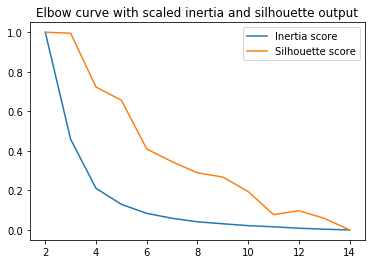

In [14]:
plt.plot(n, kmeans_inertia, label='Inertia score');
plt.plot(n, kmeans_silhouette, label='Silhouette score');
plt.legend();
plt.title('Elbow curve with scaled inertia and silhouette output');

#### _Interpretation_

## Clustering with World
_Preparing an initial cluster to understand what country's (or countries') change over time has the most influence on the world' change over time. We're going to use the number of clusters according to the elbow curve. The value looks halfway between 3 and 4, but 4 turned out a little better so we'll work with that._
<a id='reading_preparing'></a>

In [28]:
ss = StandardScaler()
clusters_scaled = ss.fit_transform(clusters)

km = KMeans(n_clusters = 4, random_state=1994)
km.fit(clusters_scaled)


centers = km.cluster_centers_
clusters['label'] = km.labels_

for i in range(0, 4):
    print(f'There are {len(clusters[clusters.label==i])} countries in cluster {i}')


There are 20 countries in cluster 0
There are 1 countries in cluster 1
There are 15 countries in cluster 2
There are 2 countries in cluster 3


In [37]:
clusters.loc['World'].label

3.0

In [40]:
clusters[clusters.label==3].index

Index(['China', 'World'], dtype='object')

#### The World was classified as cluster 3, along with China. That's reflected in the three graphs below.

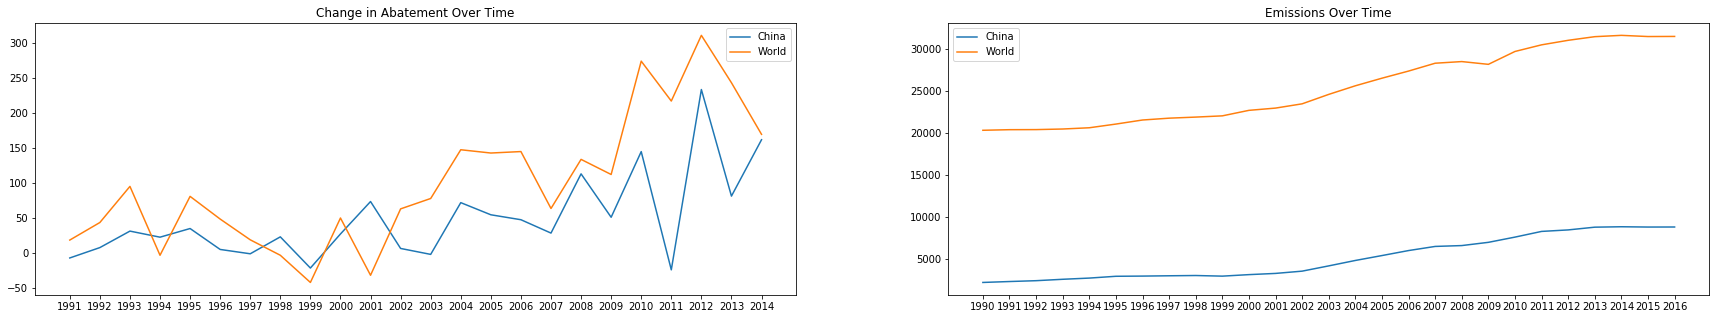

In [50]:
plt.figure(figsize=(30,5))
plt.subplot(1, 2, 1)
plt.plot(abatement_yoy_change['China'], label='China');
plt.plot(abatement_yoy_change['World'], label='World');
plt.title('Change in Abatement Over Time')
plt.legend();

plt.subplot(1, 2, 2)
plt.plot(emissions.loc['China'], label='China');
plt.plot(emissions.loc['World'], label='World');
plt.title('Emissions Over Time')
plt.legend();

In [53]:
clusters_1 = clusters.drop('World')

In [54]:
clusters_1 = clusters_1.iloc[:, 0:24]

In [161]:
ss = StandardScaler()
clusters_scaled = ss.fit_transform(clusters_1)

km = KMeans(n_clusters = 7, random_state=1994)
km.fit(clusters_scaled)


centers = km.cluster_centers_
centers = pd.DataFrame(centers)
clusters_1['label'] = km.labels_

for i in range(0, 6):
    print(f'There are {len(clusters_1[clusters_1.label==i])} countries in cluster {i}')

There are 1 countries in cluster 0
There are 28 countries in cluster 1
There are 1 countries in cluster 2
There are 1 countries in cluster 3
There are 1 countries in cluster 4
There are 4 countries in cluster 5


In [271]:
clusters_1.to_csv('./Data/clusters_abatement.csv')
emissions.to_csv('./Data/clusters_emissions.csv')
centers.to_csv('./Data/cluster_centers.csv')

### Cluster 0
#### notes

Countries in cluster 1: 
['United States']


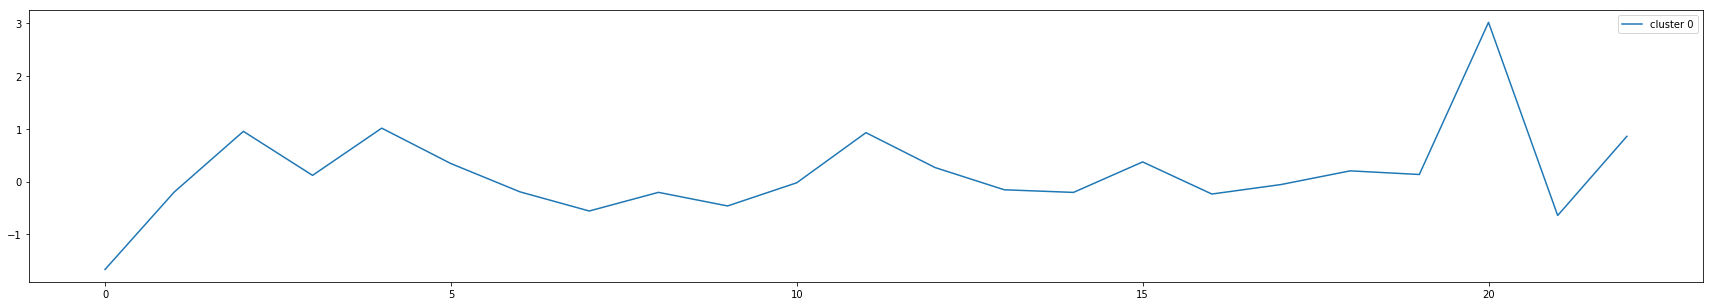

In [223]:
plt.figure(figsize=(30,5))
plt.plot(centers.iloc[0, 0:23], label='cluster 0');
plt.legend();
print(f'Countries in cluster 1: \n{[n for n in clusters_1[clusters_1.label==0].index]}')

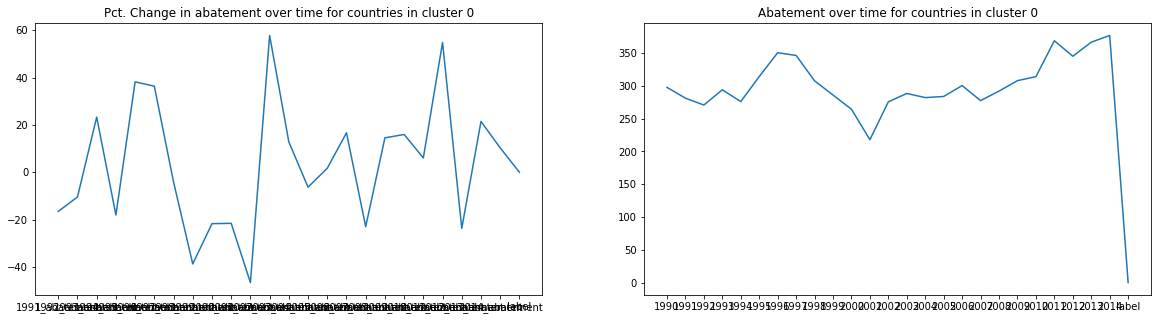

In [224]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(clusters_1[clusters_1.label==0].T);
plt.title('Pct. Change in abatement over time for countries in cluster 0');

plt.subplot(1,2,2)
plt.plot(abatement[abatement.label==0].T);
plt.title('Abatement over time for countries in cluster 0');

### Cluster 1
#### So we have a lot of countries contained in this cluster (28 of 37). Note in the graph below that these countries have a relatively steady trend with a standardized percent change between +-0.3

Countries in cluster 1: 
['Algeria', 'Argentina', 'Australia', 'Belgium', 'Chile', 'France', 'Indonesia', 'Italy', 'Kazakhstan', 'Kuwait', 'Malaysia', 'Mexico', 'Netherlands', 'New Zealand', 'Nigeria', 'Poland', 'Portugal', 'Romania', 'Saudi Arabia', 'South Africa', 'Spain', 'Sweden', 'Thailand', 'Turkey', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'Uzbekistan']


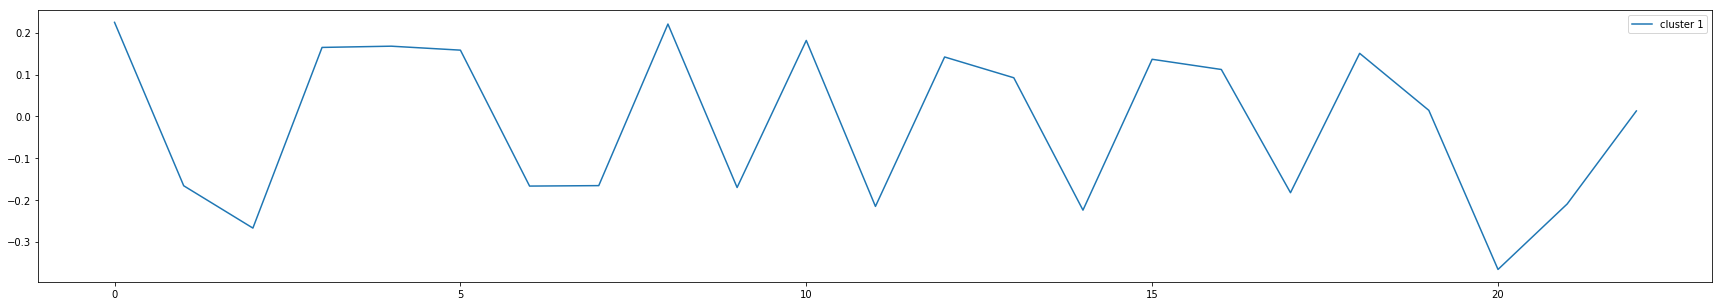

In [162]:
plt.figure(figsize=(30,5))
plt.plot(centers.iloc[1, 0:23], label='cluster 1');
plt.legend();
print(f'Countries in cluster 1: \n{[n for n in clusters_1[clusters_1.label==1].index]}')

In [238]:
abatement['label'] = clusters_1.label
emissions['label'] = clusters_1.label

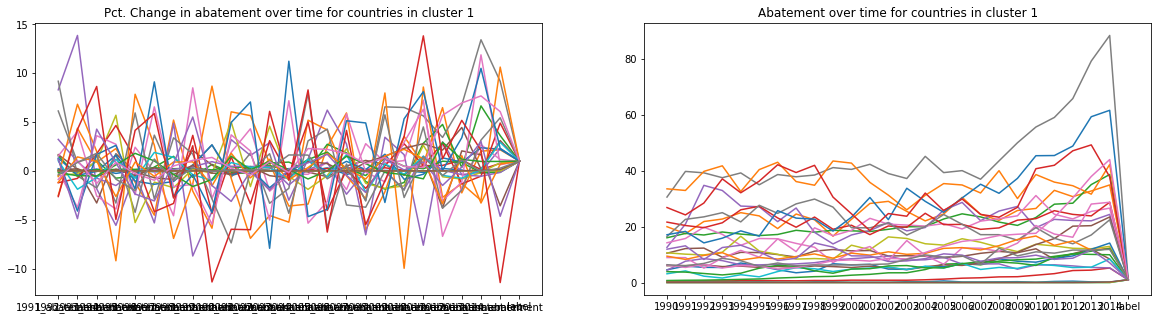

In [264]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(clusters_1[clusters_1.label==1].T);
plt.title('Pct. Change in abatement over time for countries in cluster 1');

plt.subplot(1,2,2)
plt.plot(abatement[abatement.label==1].T);

plt.title('Abatement over time for countries in cluster 1');

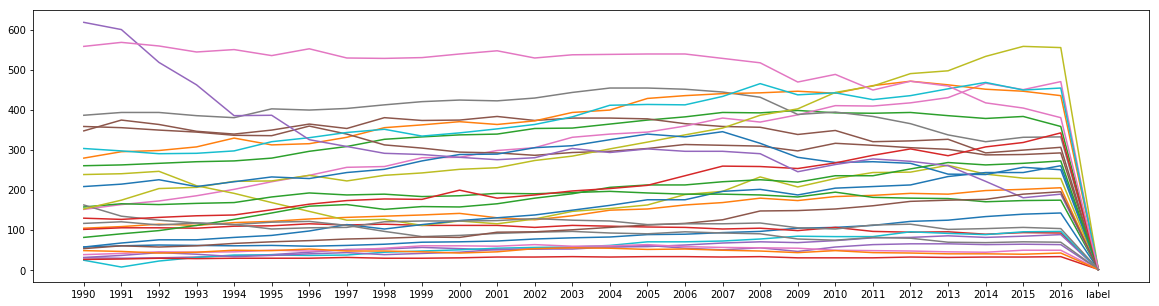

In [267]:
plt.figure(figsize=(20,5))
plt.plot(emissions[emissions.label==1].T);

##### _Although the map to the look appears hectic, it's really telling us countries in this group have had a relatively small amount of change over time, with their maximum and minimum changes between 15 and -10%. Additionally, their patterns of abatement look similar in shape and trend.

## Cluster 2
### notes

Countries in cluster 2: 
['Norway']


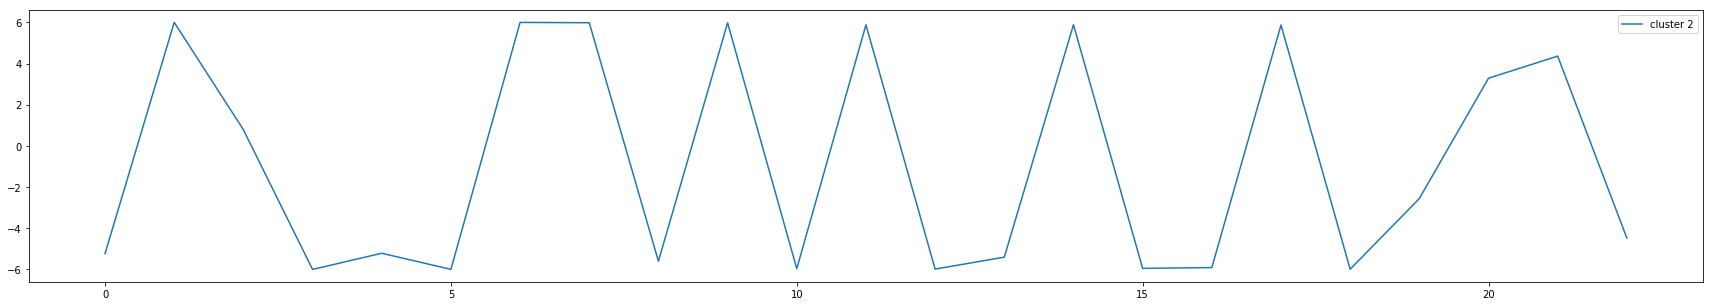

In [225]:
plt.figure(figsize=(30,5))
plt.plot(centers.iloc[2, 0:23], label='cluster 2');
plt.legend();
print(f'Countries in cluster 2: \n{[n for n in clusters_1[clusters_1.label==2].index]}')

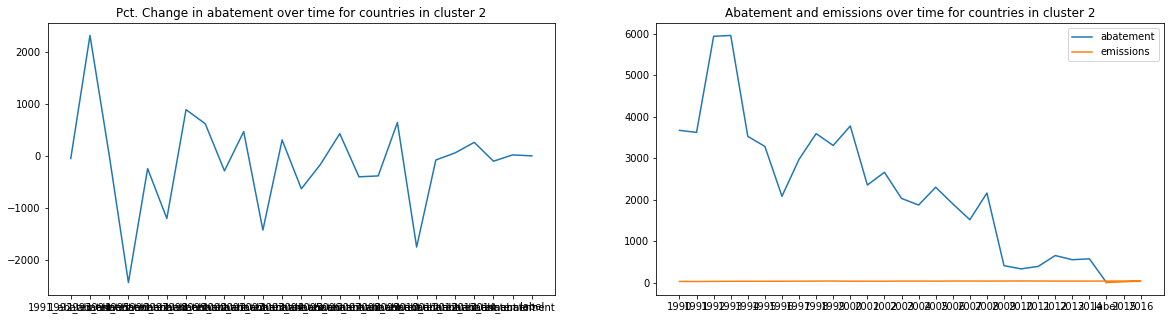

In [256]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(clusters_1[clusters_1.label==2].T);
plt.title('Pct. Change in abatement over time for countries in cluster 2');

plt.subplot(1,2,2)
plt.plot(abatement[abatement.label==2].T, label='abatement');
plt.plot(emissions[emissions.label==2].T, label='emissions');
plt.legend()
plt.title('Abatement and emissions over time for countries in cluster 2');

## Cluster 3
### notes

Countries in cluster 3: 
['China']


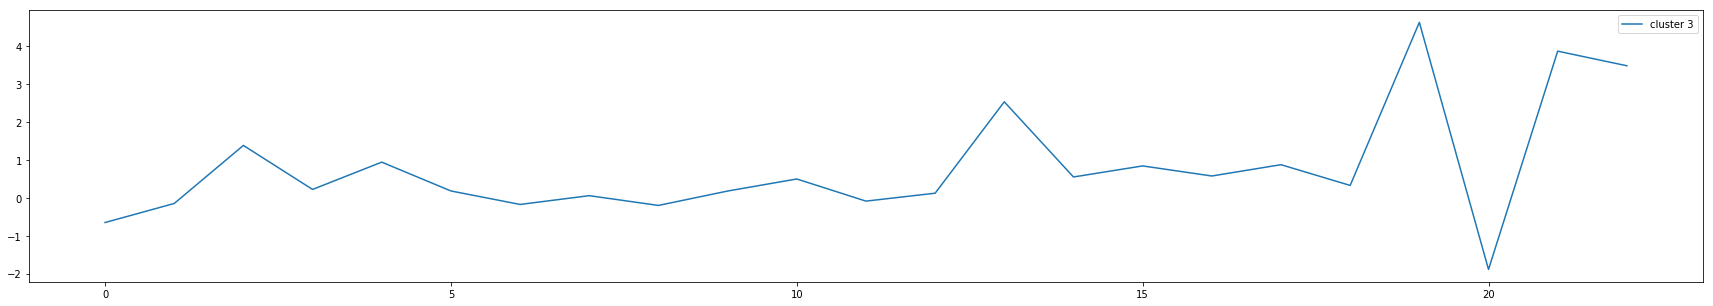

In [229]:
plt.figure(figsize=(30,5))
plt.plot(centers.iloc[3, 0:23], label='cluster 3');
plt.legend();
print(f'Countries in cluster 3: \n{[n for n in clusters_1[clusters_1.label==3].index]}')

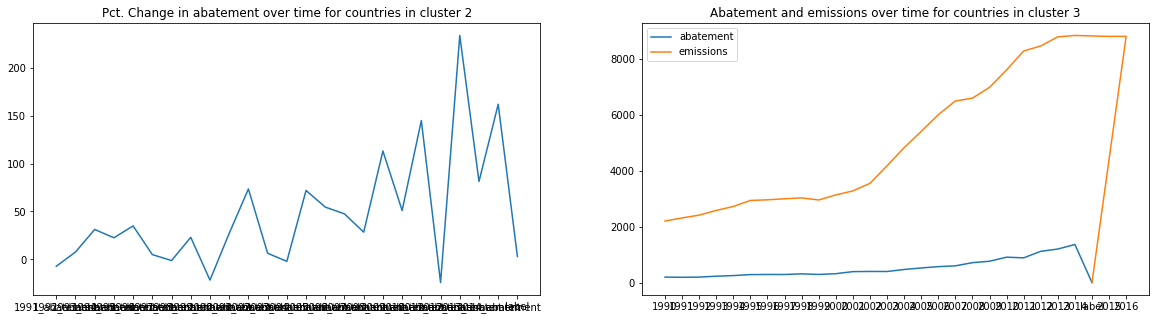

In [255]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(clusters_1[clusters_1.label==3].T);
plt.title('Pct. Change in abatement over time for countries in cluster 2');

plt.subplot(1,2,2)
plt.plot(abatement[abatement.label==3].T,label='abatement');
plt.plot(emissions[emissions.label==3].T,label='emissions');
plt.legend()
plt.title('Abatement and emissions over time for countries in cluster 3');

## Cluster 4
### notes

Countries in cluster 4: 
['Brazil']


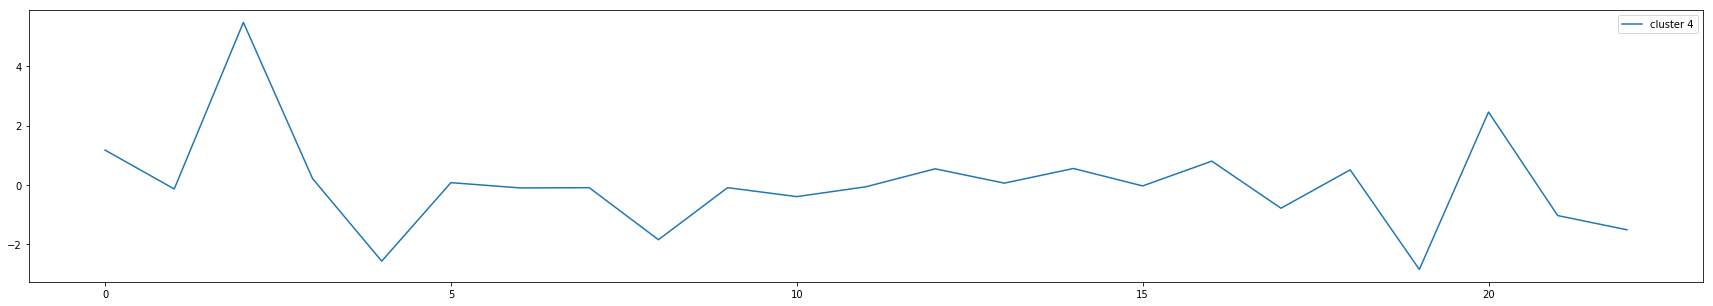

In [231]:
plt.figure(figsize=(30,5))
plt.plot(centers.iloc[4, 0:23], label='cluster 4');
plt.legend();
print(f'Countries in cluster 4: \n{[n for n in clusters_1[clusters_1.label==4].index]}')

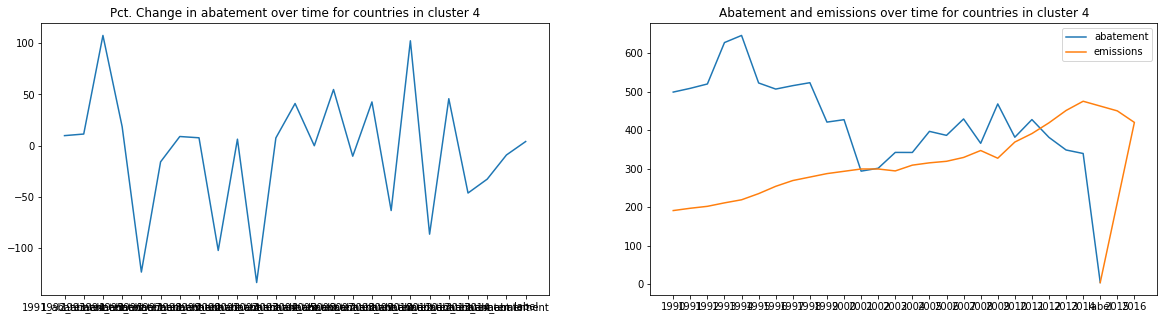

In [251]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(clusters_1[clusters_1.label==4].T);
plt.title('Pct. Change in abatement over time for countries in cluster 4');

plt.subplot(1,2,2)
plt.plot(abatement[abatement.label==4].T, label='abatement');
plt.plot(emissions[emissions.label==4].T, label='emissions');
plt.legend()
plt.title('Abatement and emissions over time for countries in cluster 4');

## Cluster 5
### notes

Countries in cluster 5: 
['Colombia', 'Germany', 'India', 'Japan']


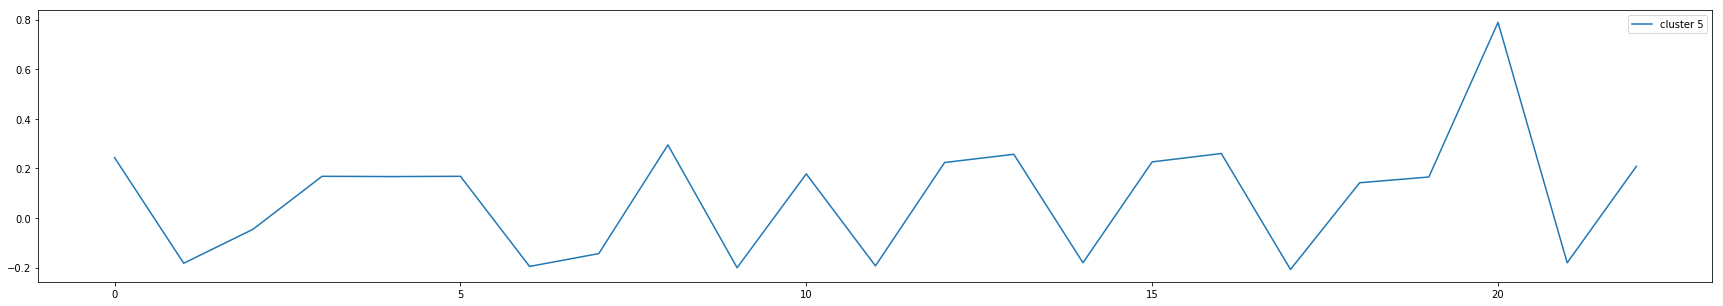

In [248]:
plt.figure(figsize=(30,5))
plt.plot(centers.iloc[5, 0:23], label='cluster 5');
plt.legend();
print(f'Countries in cluster 5: \n{[n for n in clusters_1[clusters_1.label==5].index]}')

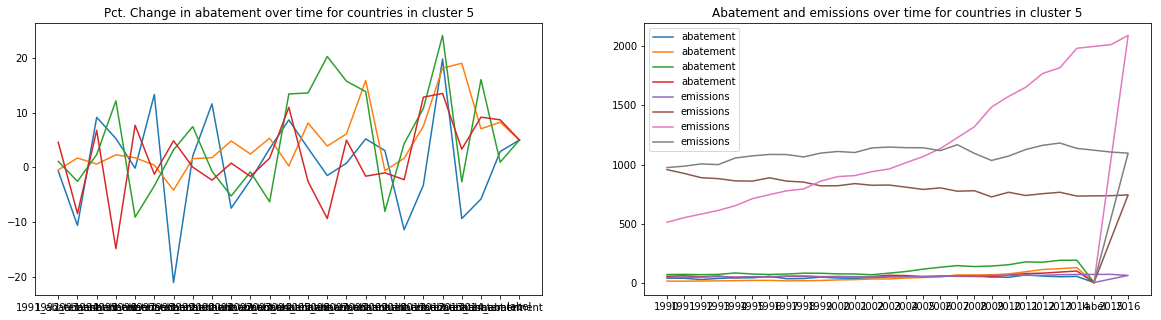

In [252]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(clusters_1[clusters_1.label==5].T);
plt.title('Pct. Change in abatement over time for countries in cluster 5');

plt.subplot(1,2,2)
plt.plot(abatement[abatement.label==5].T, label='abatement');
plt.plot(emissions[emissions.label==5].T, label='emissions');

plt.legend()
plt.title('Abatement and emissions over time for countries in cluster 5');

## Cluster 6
### notes

Countries in cluster 6: 
['Canada']


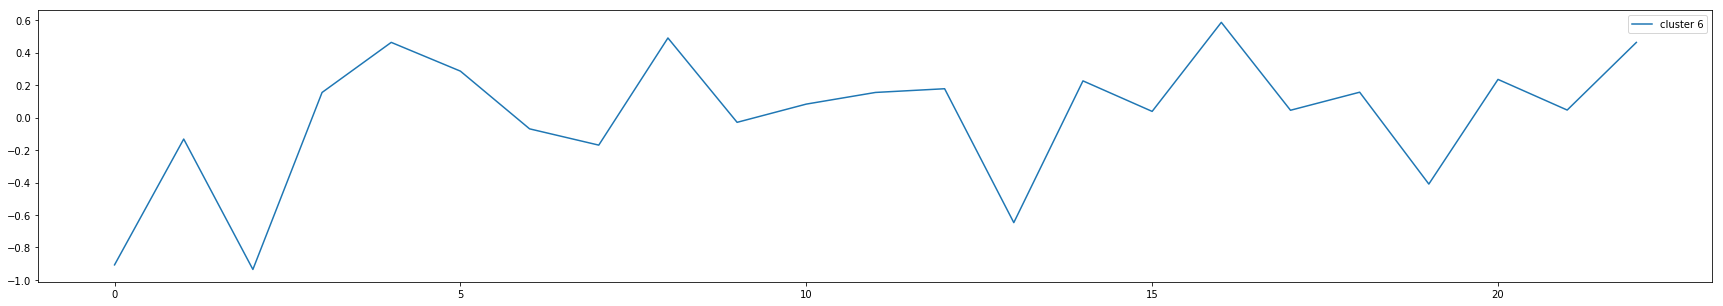

In [268]:
plt.figure(figsize=(30,5))
plt.plot(centers.iloc[6, 0:23], label='cluster 6');
plt.legend();
print(f'Countries in cluster 6: \n{[n for n in clusters_1[clusters_1.label==6].index]}')

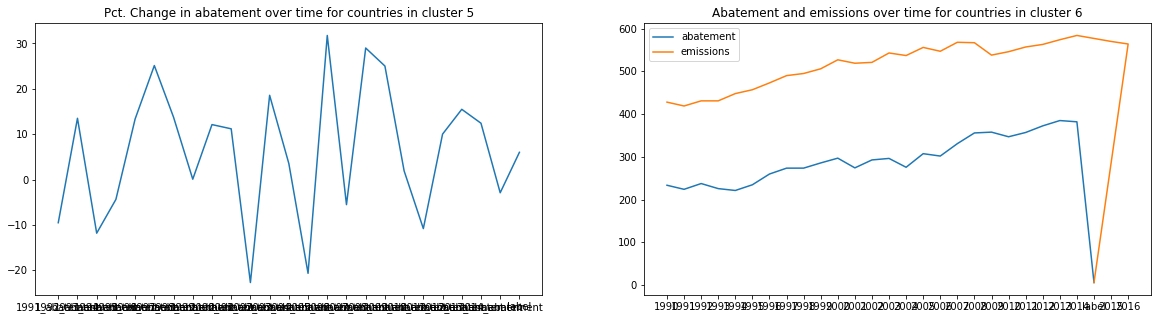

In [269]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(clusters_1[clusters_1.label==6].T);
plt.title('Pct. Change in abatement over time for countries in cluster 5');

plt.subplot(1,2,2)
plt.plot(abatement[abatement.label==6].T, label='abatement');
plt.plot(emissions[emissions.label==6].T, label='emissions');

plt.legend()
plt.title('Abatement and emissions over time for countries in cluster 6');

The countries in cluster 6 are: 
 ['Canada']
The countries in cluster 5 are: 
 ['Colombia', 'Germany', 'India', 'Japan']
The countries in cluster 1 are: 
 ['Algeria', 'Argentina', 'Australia', 'Belgium', 'Chile', 'France', 'Indonesia', 'Italy', 'Kazakhstan', 'Kuwait', 'Malaysia', 'Mexico', 'Netherlands', 'New Zealand', 'Nigeria', 'Poland', 'Portugal', 'Romania', 'Saudi Arabia', 'South Africa', 'Spain', 'Sweden', 'Thailand', 'Turkey', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'Uzbekistan']


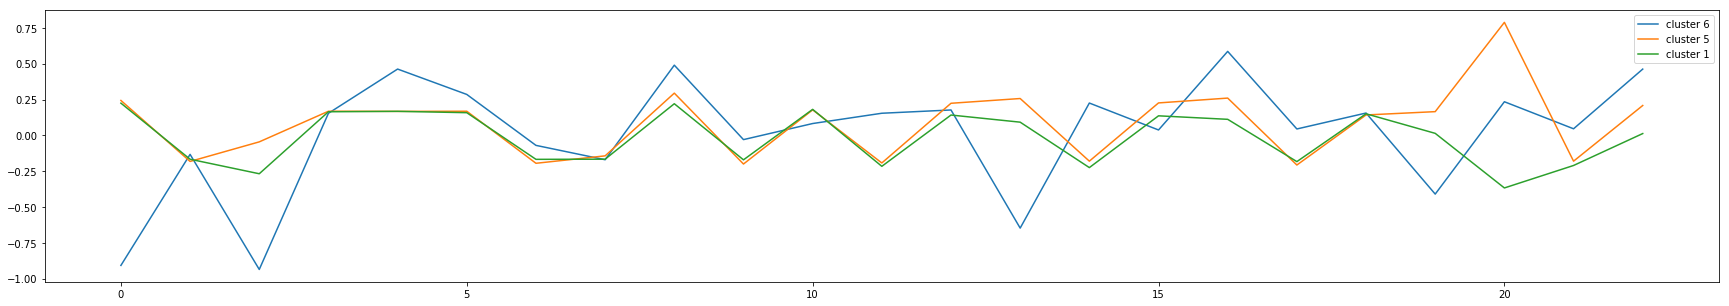

In [219]:
plt.figure(figsize=(30,5))
#plt.plot(centers.iloc[0, 0:23], label='cluster 0');
plt.plot(centers.iloc[6, 0:23], label='cluster 6');
#plt.plot(centers.iloc[3, 0:23], label='cluster 3');
plt.plot(centers.iloc[5, 0:23], label='cluster 5');
plt.plot(centers.iloc[1, 0:23], label='cluster 1');
plt.legend();

for i in [6,5,1]:
    print(f'The countries in cluster {i} are: \n {[n for n in (clusters_1[clusters_1.label==i].index)]}')

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(clusters_1[clusters_1.label==0].T);
plt.plot(clusters_1[clusters_1.label==0].T);
plt.plot(clusters_1[clusters_1.label==0].T);
plt.plot(clusters_1[clusters_1.label==0].T);
plt.plot(clusters_1[clusters_1.label==0].T);


plt.title('Pct. Change in abatement over time for countries in cluster 1');

plt.subplot(1,2,2)
plt.plot(abatement[abatement.label==1].T);
plt.title('Abatement over time for countries in cluster 1');

The countries in cluster 0 are: 
 ['United States']
The countries in cluster 3 are: 
 ['China']


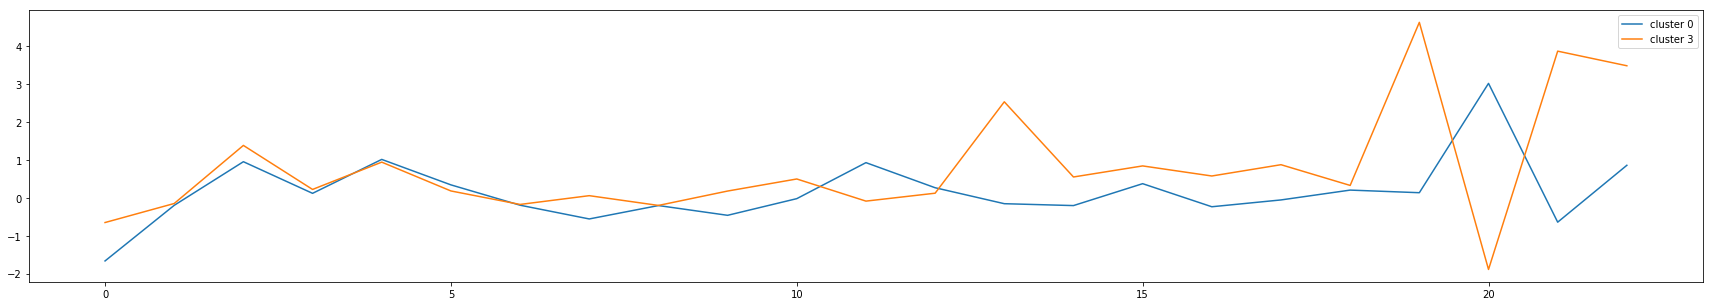

In [174]:
plt.figure(figsize=(30,5))
plt.plot(centers.iloc[0, 0:23], label='cluster 0');
plt.plot(centers.iloc[3, 0:23], label='cluster 3');
plt.legend();

for i in [0,3]:
    print(f'The countries in cluster {i} are: \n {[n for n in (clusters_1[clusters_1.label==i].index)]}')

Countries in cluster 2: 
['Norway']
Countries in cluster 4: 
['Brazil']


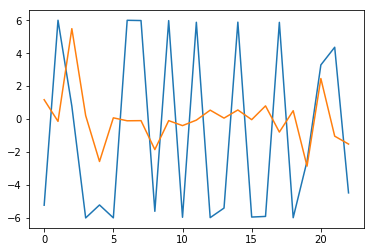

In [153]:
plt.plot(centers.iloc[2, 0:23], label='cluster 2');
plt.plot(centers.iloc[4, 0:23], label='cluster 4');
print(f'Countries in cluster 2: \n{[n for n in clusters_1[clusters_1.label==2].index]}')
print(f'Countries in cluster 4: \n{[n for n in clusters_1[clusters_1.label==4].index]}')


In [131]:
for i in [0,6]:
    print(f'Countries in cluster {i}: \n{[n for n in clusters_1[clusters_1.label==i].index]}')

Countries in cluster 0: 
['United States']
Countries in cluster 6: 
['Canada']


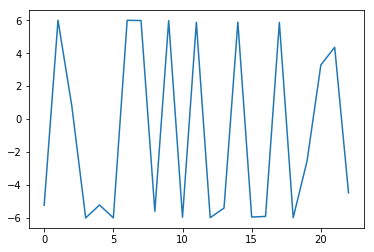

There are 2 countries in cluster 3
['China']
There are 0 countries in cluster 4
['Brazil']
There are 0 countries in cluster 5
['Colombia', 'Germany', 'India', 'Japan']


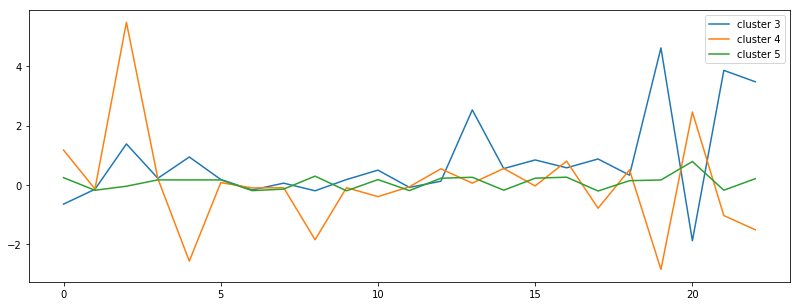

In [129]:
plt.figure(figsize=(30,5))
plt.subplot(1, 2, 1)

plt.legend();

for i in [3,4,5]:
    print(f'There are {len(clusters[clusters.label==i])} countries in cluster {i}')
    print([n for n in clusters_1[clusters_1['label']==i].index])

1. overall mean: mean of all datapoints used in cluster
2. sample means: means of each attribute included in cluster
3. ssb: (sample mean - overall mean ^2 )* n
4. MSB Final = ssb/(k-1) 
5. MSW Final = ssw or inertia/(n-k)
score = ssb/ssw

- try clustering with abatement notebook for yoy
- countries are rows, years are columns (include all years)
    - normalize all the data
    - use pctchange
- add in gdp pc
- use the labels to inform model groupings
- describe each group:
    - why are they in there?
    - who is the outlier?
    - who is the median?
   
   
- cluster represents abatement progress over time
 

To do:
- try to articulate descriptions for each cluster
    - were there certain times when there was a spike or drop
    - take each cluster and plot out abatement for all countries within that cluster
- look more into the attributes/commonalities within these disparaging groups

- consolidate this information into a presentation format
- final model to predict next 5 years (goal)

Variance analysis:
- build a table
- look at variance within clusters